# New Template

# Setup
Specify some paths and names in the cell below.

In [38]:
configDir = "T:/Data/"  # Path to folder where you saved your wildlifeconfig file.
filter_set_json = ""
taxon_json = ""
query_name = 'withRTest1'
use_eBird = True
use_GBIF = True

### GBIF request method
Whether to get records from GBIF in a darwin core archive.  "False" uses the GBIF API, which has limitations that may be important.  "True" requests results be emailed in a darwin core archive.

In [39]:
get_dwca = True 

### An important, temporary bug fix
There is a bug with mpl_toolkits, the following code is a temporary fix until they resolve the bug.
https://stackoverflow.com/questions/52911232/basemap-library-using-anaconda-jupyter-notebooks-keyerror-proj-lib/54087410#54087410

os.environ['PROJ_LIB'] should be set equal to something like "c:/Users/jramone/AppData/Local/Continuum/miniconda3/envs/wrangler/Library/share"

In [40]:
#import os
#os.environ['PROJ_LIB'] = "c:/Users/nmtarr/AppData/Local/Continuum/miniconda3/envs/wrangler/Library/share"

Nothing to fill out in the next cell

In [65]:
%matplotlib inline
import sqlite3
import pprint
import json
import pandas as pd
import numpy as np
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.max_rows', 150)
from IPython.display import Image
from pygbif import occurrences
import matplotlib.pyplot as plt
import os
from datetime import datetime
t1 = datetime.now()
import sys
sys.path.append(configDir)
import wranglerconfig as config
codeDir = config.codeDir
sys.path.append(codeDir)
import wrangler_functions as functions
working_directory = config.workDir
output_database = working_directory + query_name + '.sqlite'
username = config.gbif_username
password = config.gbif_password
email = config.gbif_email
EBD_file = config.EBD_file
print("Notebook run " + str(t1))
print(output_database)

Notebook run 2021-03-31 12:06:11.127094
T:/Occurrence_Records/withRTest1.sqlite


# Specify a taxon
GBIF and eBird Basic Dataset can currently be accessed.  Specificy the appropriate identifiers in the cell below.

NOTE -- cautions about taxon concept mismatches and errors

In [42]:
your_taxon_id = "TestCuckoo"
gbif_id = 2496287 
ebird_id = "Yellow-billed Cuckoo"
detection_distance_m = 200
taxon_polygon = "POLYGON ((-84.09680233298448 36.69265225442667, -84.07962135716329 34.5561660300382, -84.07962135716329 34.5561660300382, -80.25685423694925 34.65515526072436, -81.15026497965096 36.71331438415306, -84.09680233298448 36.69265225442667))"

In [43]:
# If a json was provided, use it, otherwise create a new one with info that was provided.
if taxon_json == "":
    # Build a species dictionary
    taxon_info = {"ID": your_taxon_id, "GBIF_ID": gbif_id, "EBIRD_ID": ebird_id, "detection_distance_m": detection_distance_m,
                  "TAXON_EOO": taxon_polygon}

    # Save as json object
    out_file = open(working_directory + your_taxon_id + ".json", "w")  
    json.dump(taxon_info, out_file) 
    out_file.close() 

if taxon_json != "":
    with open(taxon_json, "r") as f:
        taxon_info = json.load(f)
        f.close()
        
pprint.pprint(taxon_info)

{'EBIRD_ID': 'Yellow-billed Cuckoo',
 'GBIF_ID': 2496287,
 'ID': 'TestCuckoo',
 'TAXON_EOO': 'POLYGON ((-84.09680233298448 36.69265225442667, '
              '-84.07962135716329 34.5561660300382, -84.07962135716329 '
              '34.5561660300382, -80.25685423694925 34.65515526072436, '
              '-81.15026497965096 36.71331438415306, -84.09680233298448 '
              '36.69265225442667))',
 'detection_distance_m': 200}


# Specify a filter set
Fill out this section to specify how you want records filtered and cleaned.  Alternatively, you can load a filter set here by specifying a path in the first cell of this notebook.  

To skip a filter, enter "None" without the quotation marks or "".  

In [44]:
filter_set_name = "test_filters_1"

### Date limits
Enter year and month ranges.  For example, years_range = 2015,2017 and months_range = 3,6

Justification: 

In [45]:
years_range = "2015,2020"
months_range = "9,11"

### Country
Notes:

In [46]:
country = "US"

### Bounding box
Coordinates should correspond to WGS84 (EPSG:4326).  Don't use this option if you specify a query polygon below.

Notes:

In [47]:
lat_range = "27,41"
lon_range = "-89,-75"

### Taxon EOO
True or False whether you want to apply the taxon EOO to the filtering.  If True, removes records with centroids outside of the extent of occurrence geometry you provided in taxon_info.

Notes:

In [48]:
use_taxon_geometry = True

### Geoissue
Are GBIF records with noted geoissues OK to include? GBIF only.

Notes:

In [49]:
geoissue = False

### Collections
List collection codes that you'd like to omit. GBIF only.

Notes:

In [50]:
collection_codes_omit = ""

### Institutions
List institution codes that you'd like to omit. GBIF only

Notes:

In [51]:
institutions_omit = ""

### Datasets
List datasets that you'd like to omit.
#### ebird project here?

Notes:

In [52]:
datasets_omit = ""

### Coordinate uncertainty
Do you want to remove records without coordinate uncertainty (1) or leave them in the data set (0)?  Note that eBird records in GBIF (EOD) do not have this and neither do data in the EBD dataset.  With the EBD, the length of traveling counts is used as a surrogate value /??!!!!!?????.  

max_coordinate_uncertainty must be an integer greater than 0.

default_coordUncertainty -- coordinateUncertaintyInMeters is often not provided.  Here is an option to use a default.  If you don't want anything entered, set this equal to False (boolean, not string).

A maximum for coordinate uncertainty can also be set in meters.

Notes:

In [53]:
has_coordinate_uncertainty = True
default_coordUncertainty = 1000
max_coordinate_uncertainty = 10000

### Bases
List bases of records that you want to omit.  GBIF only.

Notes:

In [54]:
bases_omit = ""

### Sampling protocols
List sampling protocols that you would like to omit.  Options for eBird are ........._______

Notes:

In [55]:
sampling_protocols_omit = ""

### Issues
List issues that you want to omit.  GBIF only.

Notes:

In [56]:
issues_omit = ""

### Geometry (polygons)
Specify polygons to use for spatial filtering.  Records with coordinates outside of the polygons will be removed.  You can specify a geometry for the query and one for the species.  The species geometry is included to facilitate better handling of taxonomic issues.  If both are provided, the intersection is calculated and used as the filter.  The format should be well known text in WGS84 (EPSG 4326), and very importantly, vertices need to be listed counter-clockwise.  See the ccw_wkt_from_shp() function in wrangler functions for help.

Notes:

In [57]:
query_polygon = "POLYGON ((-82.74809573102132 36.96082629937069, -85.0932989306133 35.63154639485496, -81.0987220521874 33.56697226279766, -79.4235769096217 36.34054727735634, -79.4235769096217 36.34054727735634, -82.74809573102132 36.96082629937069))"

### Duplicates
Specify whether duplicates on latitude, longitude, and date should be included.

Notes:

In [58]:
duplicates_OK = False

### Save or load the filter set

In [59]:
if filter_set_json == "":
    # Build a filter set dictionary
    filter_set = {"name": filter_set_name, "query_polygon": query_polygon, "issues_omit": issues_omit,
                  "sampling_protocols_omit": sampling_protocols_omit, "bases_omit": bases_omit,
                  "has_coordinate_uncertainty": has_coordinate_uncertainty, "geoissue": geoissue,
                  "default_coordUncertainty": default_coordUncertainty,
                  "max_coordinate_uncertainty": max_coordinate_uncertainty,
                  "datasets_omit": datasets_omit, "collection_codes_omit": collection_codes_omit,
                  "institutions_omit": institutions_omit, "geoissue": geoissue, "use_taxon_geometry": use_taxon_geometry,
                  "lat_range": lat_range, "lon_range": lon_range, "country": country, 
                  "years_range": years_range, "months_range": months_range, "duplicates_OK": duplicates_OK, "get_dwca": get_dwca}
    
    # Replace empty strings with None
    for x in filter_set.keys():
        if filter_set[x] == "":
            filter_set[x] = None
    
    # Save as json object
    with open(working_directory + filter_set_name + ".json", "w") as f:
        json.dump(filter_set, f) 
        f.close()
        
if filter_set_json != "":
    with open(filter_set_json, "r") as f:
        filter_set = json.load(f)
        f.close()
        
    # Replace empty strings with None
    for x in filter_set.keys():
        if filter_set[x] == "":
            filter_set[x] = None
        
pprint.pprint(filter_set)

{'bases_omit': None,
 'collection_codes_omit': None,
 'country': 'US',
 'datasets_omit': None,
 'default_coordUncertainty': 1000,
 'duplicates_OK': False,
 'geoissue': False,
 'get_dwca': True,
 'has_coordinate_uncertainty': True,
 'institutions_omit': None,
 'issues_omit': None,
 'lat_range': '27,41',
 'lon_range': '-89,-75',
 'max_coordinate_uncertainty': 10000,
 'months_range': '9,11',
 'name': 'test_filters_1',
 'query_polygon': 'POLYGON ((-82.74809573102132 36.96082629937069, '
                  '-85.0932989306133 35.63154639485496, -81.0987220521874 '
                  '33.56697226279766, -79.4235769096217 36.34054727735634, '
                  '-79.4235769096217 36.34054727735634, -82.74809573102132 '
                  '36.96082629937069))',
 'sampling_protocols_omit': None,
 'use_taxon_geometry': True,
 'years_range': '2015,2020'}


### Connect to output database, record species and filter information.

In [87]:
output_db_conn= sqlite3.connect(output_database)
cursor = output_db_conn.cursor()
pd.DataFrame(taxon_info.values(), taxon_info.keys()).applymap(str).to_sql(name='taxon_concept', con=output_db_conn, if_exists='replace')
pd.DataFrame(filter_set.values(), filter_set.keys()).applymap(str).to_sql(name='filter_set', con=output_db_conn, if_exists='replace')

## Run Processes

In [23]:
# Create an output database
functions.build_output_database(output_database)

In [24]:
# Run the appropriate queries
if use_eBird == True and use_GBIF == True:
    # Run eBird query
    ebird_data = functions.get_EBD_records(taxon_info, filter_set, working_directory, EBD_file, query_name)
    
    # Omit Cornell Lab of Ornithology records when querying GBIF
    #  collectionCode like "EBIRD*" should be omited.  HOW???>>>>>>>!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    '''
    filter_set2 = filter_set
    filter_set2["collection_codes_omit"] = filter_set["collection_codes_omit"]''' 
    gbif_data = functions.get_GBIF_records(taxon_info, filter_set, query_name, working_directory, username, password, email) 

elif use_eBird == True and use_GBIF == False:
    # Run eBird query
    ebird_data = functions.get_EBD_records(taxon_info, filter_set, working_directory, EBD_file, query_name)

elif use_eBird == False and use_GBIF == True:
    # Run GBIF query
    gbif_data = functions.get_GBIF_records(taxon_info, filter_set, query_name, working_directory, username, password, email)

Summarized fields returned: 0:00:00.192013
Got request params and sorted out geometry constraints: 0:00:00.130373
2021 records available
Your download key is  0237154-200613084148143
Download file size: 4264635 bytes
On disk at T:/Occurrence_Records//0237154-200613084148143.zip
Download complete: 0:01:08.713436
Downloaded and loaded records: 0:00:01.888819
Summarized fields returned: 0:00:00.148245
Stored GBIF Download DOI etc.: 0:00:00


In [25]:
ebird_data.head()
ebird_data.to_csv("T:/Temp/ebird.csv")

In [26]:
gbif_data.head()
gbif_data.to_csv("T:/Temp/gbif.csv")

In [77]:
# Filter out records with undesirable values, locations, and/or duplication.
import importlib
importlib.reload(functions)
functions.apply_filters(ebird_data, gbif_data, filter_set, taxon_info, working_directory, query_name)

Summarized values acquired: 0:00:00.108893
Performed filtering: 0:00:00.044803
352 duplicate records dropped: 0:00:01.057345


### How many records made it through the filters?
This is the number of species occurrence records that were actually saved in the occurrence record sqlite database.

In [85]:
record_count = cursor.execute("SELECT COUNT(record_id) FROM occurrence_records;").fetchone()
print(str(record_count[0]) + " records")

1709 records


# Sources

In [ ]:
'''sources = pd.read_sql(sql="SELECT * FROM sources;", con=output_db_conn)
print(sources[['institutionID', 'collectionCode', 'datasetName', 'acquired', 'removed', 'retained']])'''

# Institutions

In [126]:
institution = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'institutionID';", con=output_db_conn)
print(institution[['value', 'acquired', 'removed', 'retained']])

                           value  acquired  removed  retained
0  http://grbio.org/cool/i64g...         2        1         1


# Collections

In [124]:
collections = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'collectionCode';", con=output_db_conn)
print(collections[['value', 'acquired', 'removed', 'retained']])

          value  acquired  removed  retained
0          Bird         2        1         1
1         EBIRD     31526    29983      1543
2      EBIRD_MA         4        2         2
3      EBIRD_VA       249      248         1
4  Observations       204       42       162


# Data sets

In [123]:
datasets = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'datasetName';", con=output_db_conn)
print(datasets[['value', 'acquired', 'removed', 'retained']])

                           value  acquired  removed  retained
0  iNaturalist research-grade...       201       41       160


# Bases

In [96]:
bases = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'basisOfRecord';", con=output_db_conn)
print(bases[['value', 'acquired', 'removed', 'retained']])

                value  acquired  removed  retained
0   HUMAN_OBSERVATION     30111    29949       162
1  PRESERVED_SPECIMEN         2        1         1


# Protocols

In [95]:
protocols = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'samplingProtocol';", con=output_db_conn)
print(protocols[['value', 'acquired', 'removed', 'retained']])

        value  acquired  removed  retained
0  Historical         1        0         1
1   Traveling      1895      350      1545


# Issues

In [97]:
issues = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'issues';", con=output_db_conn)
print(issues[['value', 'acquired', 'removed', 'retained']])

Empty DataFrame
Columns: [value, acquired, removed, retained]
Index: []


# Descriptions of filtered records

### Locations

In [ ]:
plot_records = False
if plot_records == True:
    make_records_shapefile()
    '''shp1 = {'file': '{0}{1}_polygons'.format(outDir, summary_name), 'column': None,
            'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'magenta',
            'fillcolor': None, 'marker':'o'}

    # Display occurrence polygons
    map_these=[shp1]

    title="{1} ({0})".format(years, common_name)
    try:
        functions.MapShapefilePolygons(map_these=map_these, title=title)
    except Exception as e:
        print("Unable to map:  " + str(e))'''

### Years represented

Text(0.5, 1.0, 'Occurrences per Year')

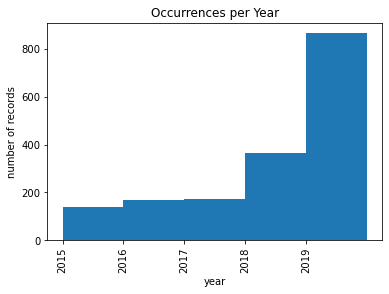

In [122]:
occ_years = [int(x[0]) for x in cursor.execute("SELECT strftime('%Y', eventDate) FROM occurrence_records").fetchall()]
years = filter_set['years_range']
years = years.split(',')
yearsrng = list(range(int(years[0]), int(years[1]), 1))
binsnum = int(years[1]) - int(years[0])
plt.hist(occ_years, bins=binsnum)
plt.ylabel("number of records")
plt.xlabel("year")
plt.xticks(yearsrng, rotation=90)
plt.title("Occurrences per Year")

### Months represented

Text(0.5, 1.0, 'Occurrences per Month')

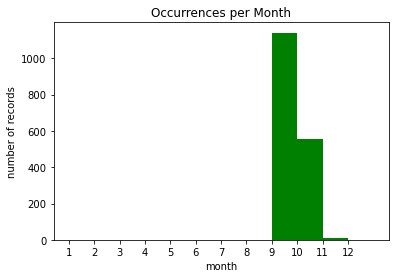

In [119]:
occ_months = [int(x[0]) for x in cursor.execute("SELECT strftime('%m', eventDate) FROM occurrence_records").fetchall()]
plt.hist(occ_months, bins=range(1, 14), color="g")
plt.ylabel("number of records")
plt.xlabel("month")
plt.xticks(range(1, 13))
plt.title("Occurrences per Month")

### Distribution of coordinate uncertainty values

In [118]:
'''occ_cert = [int(x[0]) for x in cursor.execute("SELECT coordinateUncertaintyInMeters FROM occurrence_records").fetchall()]
maxi = np.max(occ_cert)
plt.figure(figsize=(16,4))
plt.hist(occ_cert, bins=50, color="r")
plt.xticks(range(0, maxi, int(maxi/50)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("meters")
plt.title("Coordinate Uncertainty")'''

'occ_cert = [int(x[0]) for x in cursor.execute("SELECT coordinateUncertaintyInMeters FROM occurrence_records").fetchall()]\nmaxi = np.max(occ_cert)\nplt.figure(figsize=(16,4))\nplt.hist(occ_cert, bins=50, color="r")\nplt.xticks(range(0, maxi, int(maxi/50)), rotation=90)\nplt.ylabel("number of records")\nplt.xlabel("meters")\nplt.title("Coordinate Uncertainty")'

In [ ]:
'''occ_cert = [int(x[0]) for x in curs_occ.execute("SELECT coordinateUncertaintyInMeters FROM occurrences").fetchall()]
plt.figure(figsize=(16,4))
plt.boxplot(occ_cert, vert=False)
plt.xlabel("meters")
plt.title("Coordinate Uncertainty")'''

In [ ]:
'''rng_max = 2000
occ_cert2 = [x for x in occ_cert if x <= rng_max]
plt.figure(figsize=(12,4))
plt.hist(occ_cert2, bins=30, color="m", align='mid')
plt.xticks(range(0, rng_max + 100, int(rng_max/30.)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("meters")
plt.title("Coordinate Uncertainties Below 2km")'''

### Establishment means reported

In [98]:
establishment = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'establishmentMeans';", con=output_db_conn)
print(establishment[['value', 'acquired', 'removed', 'retained']])

    value  acquired  removed  retained
0  NATIVE         2        1         1


### Identification qualifiers included

In [ ]:
'''quali = curs_occ.execute("SELECT DISTINCT vals FROM unique_values WHERE field = 'IDqualifier' AND step = 'filter';").fetchall()[0]
for q in quali:
    q = q.replace('[', '').strip().replace(']', '').replace("'", "")
    print(q)
'''

### Remarks included

In [115]:
'''remarks = output_db_conn.execute("SELECT DISTINCT remarks FROM occurrence_records;").fetchall()
if len(remarks) <= 20:
    try:
        for rem in remarks:
            if rem[0][0:1] == ';':
                print(rem[0][2:])
            else:
                print(rem[0])
    except:
        pass
else:
    print("More than 20 remarks, consult the occurrence database.")'''

'remarks = output_db_conn.execute("SELECT DISTINCT remarks FROM occurrence_records;").fetchall()\nif len(remarks) <= 20:\n    try:\n        for rem in remarks:\n            if rem[0][0:1] == \';\':\n                print(rem[0][2:])\n            else:\n                print(rem[0])\n    except:\n        pass\nelse:\n    print("More than 20 remarks, consult the occurrence database.")'

### Attributes returned for the records from the GBIF request
This count was made before filters were applied

In [110]:
if use_GBIF == True:
    fields_summary = pd.read_sql("SELECT * FROM gbif_fields_returned", output_db_conn)
    fields_summary.index.name = 'Field'
    pd.set_option('display.max_rows', 250)
    print(fields_summary)

                           attribute  included(n)  populated(n)
Field                                                          
0                           abstract        30113             0
1                       accessRights        30113             2
2                      accrualMethod        30113             0
3                 accrualPeriodicity        30113             0
4                      accrualPolicy        30113             0
5                        alternative        30113             0
6                           audience        30113             0
7                          available        30113             0
8              bibliographicCitation        30113             2
9                         conformsTo        30113             0
10                       contributor        30113             0
11                          coverage        30113             0
12                           created        30113             0
13                           creator    

### Attributes returned for the records from the eBird request
This count was made before filters were applied

In [114]:
if use_eBird == True:
    fields_summary = pd.read_sql("SELECT * FROM ebird_fields_returned", output_db_conn)
    fields_summary.index.name = 'Field'
    pd.set_option('display.max_rows', 250)
    print(fields_summary)

                           attribute  included(n)  populated(n)
Field                                                          
0           global_unique_identifier         2258          2258
1                       checklist_id         2258          2258
2                       project_code         2258          2258
3                   last_edited_date         2258          2258
4                        common_name         2258          2258
5                  observation_count         2258          2258
6                           locality         2258          2258
7                           latitude         2258          2258
8                          longitude         2258          2258
9                   observation_date         2258          2258
10                       observer_id         2258          2258
11                effort_distance_km         2258          1896
12                     protocol_type         2258          2258
13                    effort_area_ha    

### Citations for records downloaded from GBIF

In [103]:
'''if get_dwca == True:
    print(cursor.execute("SELECT citations FROM GBIF_download_info").fetchall()[0][0])
else:
    print("Set 'get_dwca' to True to acquire a list of citations")'''

'if get_dwca == True:\n    print(cursor.execute("SELECT citations FROM GBIF_download_info").fetchall()[0][0])\nelse:\n    print("Set \'get_dwca\' to True to acquire a list of citations")'

### Rights associated with records downloaded from GBIF

In [ ]:
'''if get_dwca == True:
    print(curs_occ.execute("SELECT rights FROM GBIF_download_info").fetchall()[0][0])
else:
    print("Set 'get_dwca' to True to see the rights")'''

### GBIF download doi

In [ ]:
'''if get_dwca == True:
    doi = curs_occ.execute("SELECT doi FROM GBIF_download_info").fetchall()[0][0]
    print("https://doi.org/" + doi)
else:
    print("Set 'get_dwca' to True to perform a search with a doi assigned")'''

### GBIF Download Key

In [102]:
'''if get_dwca == True:
    print(curs_occ.execute("SELECT download_key FROM GBIF_download_info").fetchall()[0][0])
else:
    print("Set 'get_dwca' to True to perform a search with a download key assigned")'''

'if get_dwca == True:\n    print(curs_occ.execute("SELECT download_key FROM GBIF_download_info").fetchall()[0][0])\nelse:\n    print("Set \'get_dwca\' to True to perform a search with a download key assigned")'

### Runtime

In [ ]:
t2 = datetime.now()
print(t2 - t1)